# Evalution Result
| YOLO-formal | train | validation | test |
| ------- | ------- | ------- | ------- |
| mAP50  | 0.995 | 0.995  | 0.995  |
| mAP50-95   | 0.977  | 0.933  | 0.931  |
| Precision   | 1  | 1  | 1  |
| Recall  | 1  | 0.998  | 0.998  |

# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import yolov5

In [ ]:
%cd /content/gdrive/MyDrive/42028_Assessment3

/content/gdrive/MyDrive/42028_Assessment3


In [ ]:
ls

 dataset/                                pre_seat.ipynb
 dataset_empty/                          ssd_coco_dataset/
 dataset_empty_pascal/                   unzip.ipynb
 experiment/                             Video_Inference/
 obj_train_data/                         yolo_angle_3_1_standing.zip
 original/                              'yolo_empty(Data enhancement).ipynb'
 pre_dataset/                            yolo_empty.ipynb
 pre_dataset_angle3standing/            'yolo_formal(Data_enhancement).ipynb'
'pre_dataset_angle3standing\test.txt'    yolo_formal.ipynb
'pre_dataset_angle3standing\train.txt'   YOLO_STANDING/
'pre_dataset_angle3standing\val.txt'     yolov5/


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git # Import the existing yolov5 model

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5

/content/gdrive/MyDrive/42028_Assessment3/yolov5


In [ ]:
!pip install -r requirements.txt # Import package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.4 MB/s eta 0:00:00


# Prepare Dataset

Convert all png images to jpg

# Setup Training YAML File - yolov5m

## Setup Dataset Configuration (Data.yaml)

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 2
train_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/train" #@param {type:"string"}
val_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/valid" #@param {type:"string"}
test_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test" #@param {type:"string"}

class_names = ['Empty_Seat', "People_Seating"] #@param {type:"raw"}
with open('new_data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

# Start training with yolov5

In [ ]:
from datetime import datetime # To get model training time
import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library for drawing graphs

start = datetime.now() # Get the current time of start
!python train.py --img 416 --batch 32 --epochs 50 --hyp hyp.scratch.yaml --data new_data_yaml --weights empty1.pt  # The input img size was set to 416, batch size was set to 32, epochs was set to 50 rounds, and the weight algorithm was selected as YOLOv5m
end = datetime.now() # Get the current time of end
print('Trainine time:', end - start)

train: weights=empty1.pt, cfg=, data=new_data_yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 12 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: copy_paste=0.5, lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm

Text(0.5, 1.0, 'Validation')

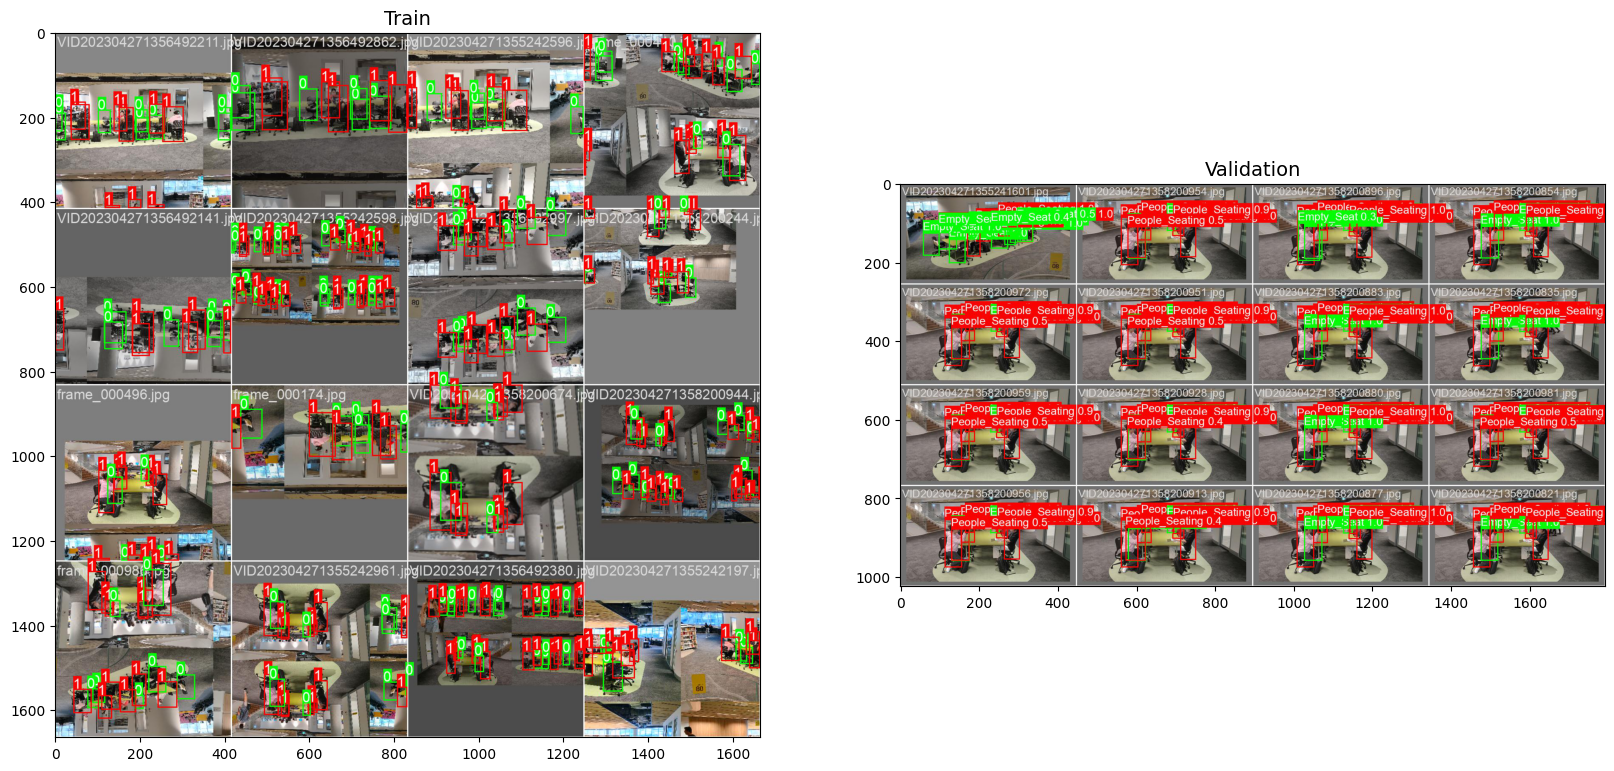

In [ ]:
import matplotlib.pyplot as plt
# !python detect.py --weight best.pt --source "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/images/VID202304271355241613.jpg" --hide-labels 
f = plt.figure(figsize=(20, 16))
ax1 = f.add_subplot(1,2,1)
ax1.imshow(plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/train_batch0.jpg"))
ax1.set_title('Train',fontsize = 14)
ax2 = f.add_subplot(1,2,2)
ax2.imshow(plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/val_batch0_pred.jpg"))
ax2.set_title('Validation',fontsize = 14)

# Get test dataset result

In [ ]:
# Get the best results from the train and test the test dataset
!python detect.py --weight /content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt --source "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/images" --hide-labels --save-txt

detect: weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], source=/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/523 /content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/images/VID202304271355241613.jpg: 384x640 7 Empty_Seats, 6 People_Seatings, 50.

# Show the result of test

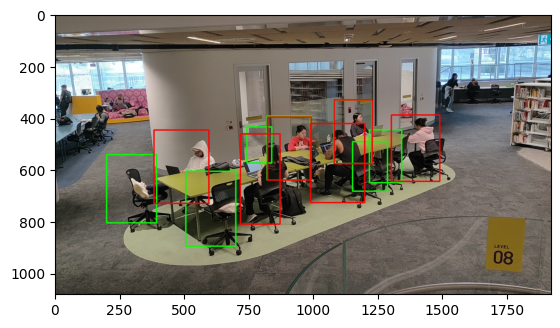

In [ ]:
import cv2
test_img = plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp16/VID202304271355242102.jpg")
resize_img = cv2.resize(test_img, (20, 20))
plt.imshow(test_img)

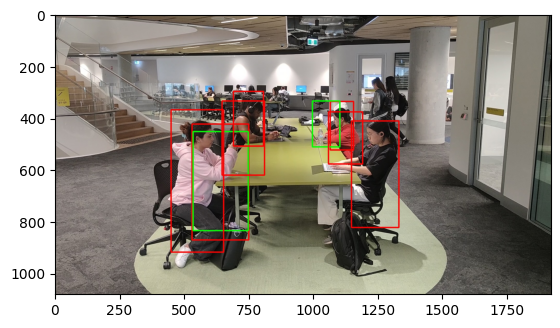

In [ ]:
import cv2
test_img = plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp16/VID202304271358200871.jpg")
resize_img = cv2.resize(test_img, (20, 20))
plt.imshow(test_img)

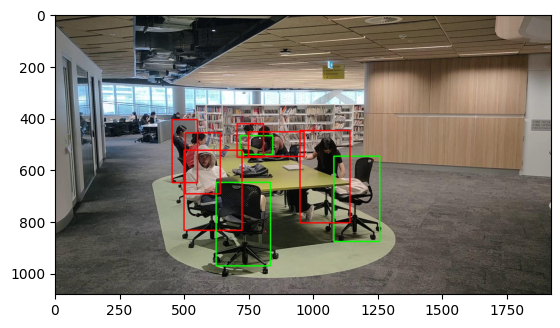

In [ ]:
import cv2
test_img = plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp16/frame_000997.jpg")
resize_img = cv2.resize(test_img, (20, 20))
plt.imshow(test_img)

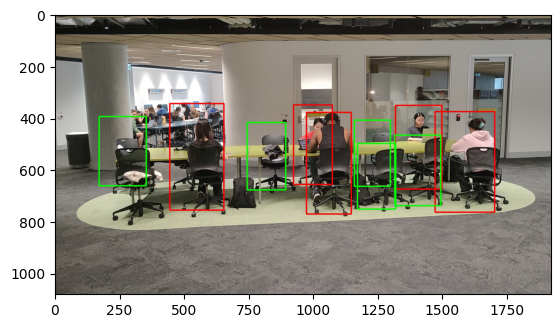

In [ ]:
import cv2
test_img = plt.imread("/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp16/VID202304271356492817.jpg")
resize_img = cv2.resize(test_img, (20, 20))
plt.imshow(test_img)

# Display performance analysis

## Show Train and Validation Visualization Result

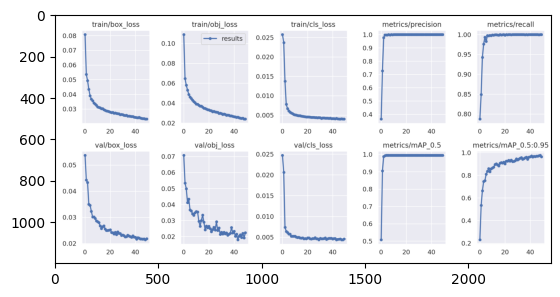

In [ ]:
from PIL import Image
image = Image.open('/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/results.png')  # Change 'exp' to the last in the train directory
#resize_img = cv2.resize(image, (20, 20))
plt.imshow(image)

## Show Validation Reselt

In [ ]:
!python val.py --weights "/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt" --data new_data_yaml

val: data=new_data_yaml, weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/gdrive/MyDrive/42028_Assessment3/dataset/data/valid/labels.cache... 519 images, 0 backgrounds, 0 corrupt: 100% 519/519 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 17/17 [00:18<00:00,  1.11s/it]
                   all        51

## Show Test Result
- The val.py is designed to evaluate the performance of the validation dataset by default. Therefore, to evaluate the performance of the test datasets, we need to modify the new_data_yaml file and rewrite the paths for the test datasets to point to the validation dataset path.

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 2
train_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/train" #@param {type:"string"}
val_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test" #@param {type:"string"}
test_data_dir = "/content/gdrive/MyDrive/42028_Assessment3/dataset/data/test" #@param {type:"string"}

class_names = ['Empty_Seat', "People_Seating"] #@param {type:"raw"}
with open('new_data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

In [ ]:
# Change the path of the validation in new_data_yaml to the path of the test dataset and see how the result of test dataset
!python val.py --weights "/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt" --data new_data_yaml

val: data=new_data_yaml, weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/labels... 523 images, 0 backgrounds, 0 corrupt: 100% 523/523 [00:51<00:00, 10.25it/s]
val: New cache created: /content/gdrive/MyDrive/42028_Assessment3/dataset/data/test/labels.cache
                 Class     Images  Instances          P     

## Confunsion Matrix - Train

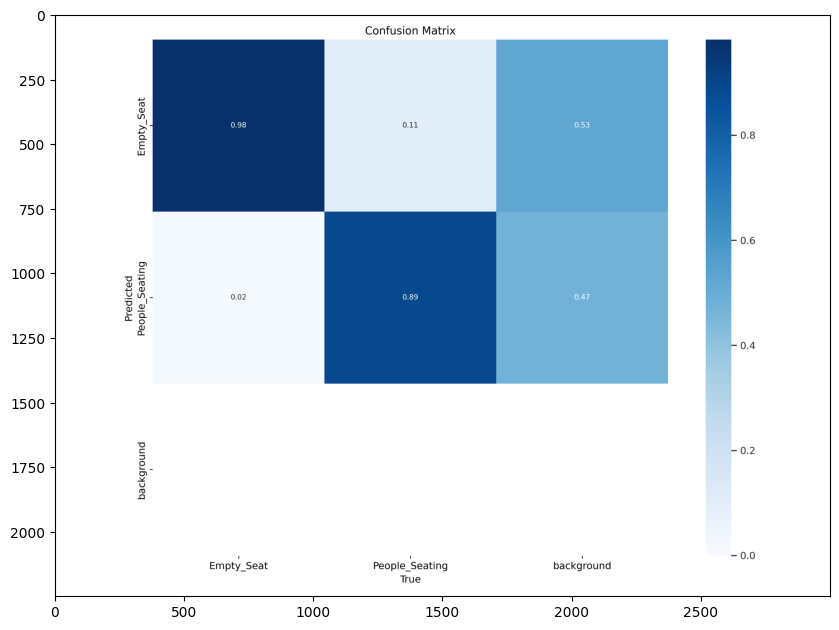

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

## Confusion Matrix - Validation

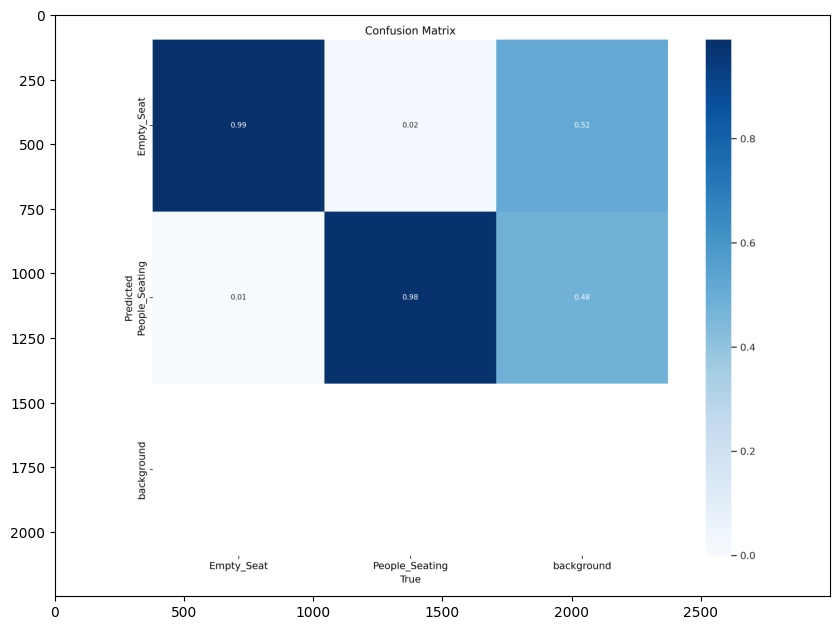

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/val/exp7/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

## Confusion Matrix - Test

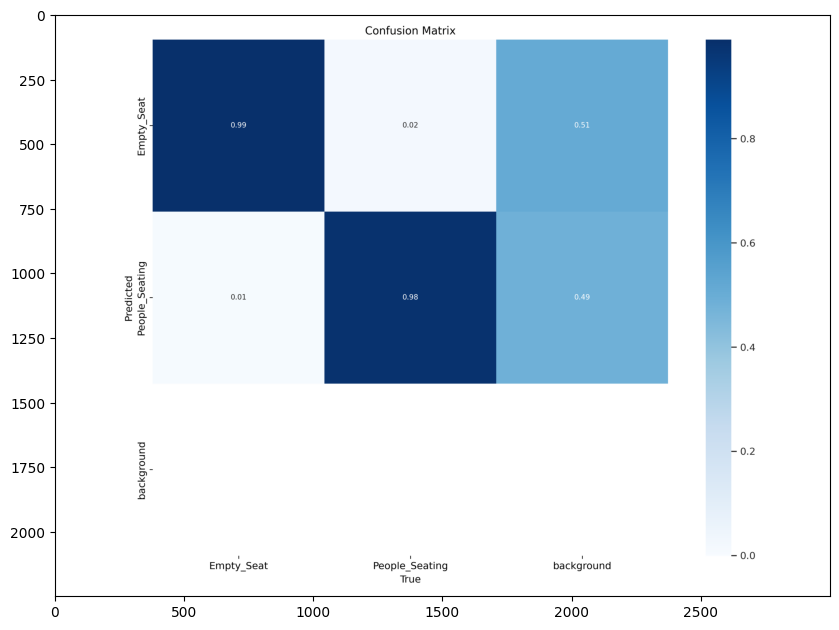

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/val/exp9/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

# Video/Real-Time Inference

## Video1-different angles

In [ ]:
!python detect.py --img 416 --weights "/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt" --source '/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112634.mp4' --conf 0.5 --save-txt

detect: weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], source=/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112634.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/1844) /content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112634.mp4: 256x416 2 Empty_Seats, 3 People_Seatin

In [ ]:
# Convert mp4 to webm
!ffmpeg -i /content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp15/VID20230327112634.mp4 -vcodec vp9 ./DetectionResult1.webm

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# Check the Result!!
import io
from base64 import b64encode
from IPython.display import HTML

with  io.open('/content/gdrive/MyDrive/42028_Assessment3/yolov5/DetectionResult1.webm','r+b') as f:
    mp4 = f.read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/webm">
</video>
""" % data_url)

## Image-different scene

In [ ]:
!python detect.py --img 416 --weights "/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt" --source '/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/WechatIMG100.jpg'

detect: weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], source=/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/WechatIMG100.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/gdrive/MyDrive/42028_Assessment3/Video_Inference/WechatIMG100.jpg: 192x416 1 People_Seating, 44.3ms
Speed: 0.4ms pre-proce

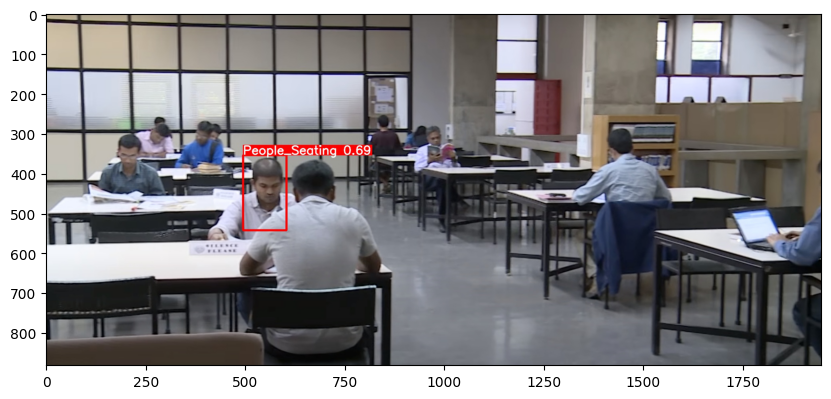

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp17/WechatIMG100.jpg')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

## Video2-different angles and tables

In [ ]:
!python detect.py --img 640 --weights "/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt" --source '/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112507.mp4' --save-txt

detect: weights=['/content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/train/exp19/weights/best.pt'], source=/content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112507.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/gdrive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/1835) /content/gdrive/MyDrive/42028_Assessment3/Video_Inference/VID20230327112507.mp4: 384x640 (no detections), 44.8ms
video

In [ ]:
# Convert mp4 to webm
!ffmpeg -i /content/gdrive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp13/VID20230327112507.mp4 -vcodec vp9 ./DetectionResult2.webm

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# Check the Result!!
import io
from base64 import b64encode
from IPython.display import HTML

with  io.open('/content/gdrive/MyDrive/42028_Assessment3/yolov5/DetectionResult2.webm','r+b') as f:
    mp4 = f.read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/webm">
</video>
""" % data_url)